In [1]:
import replot
import numpy as np

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


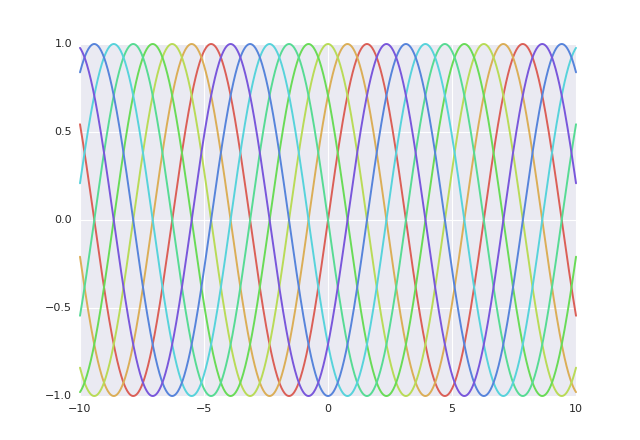

In [23]:
with replot.Figure() as figure:
    for i in range(8):
        figure.plot(lambda x: np.sin(x + np.pi * i / 4))

<IPython.core.display.Javascript object>


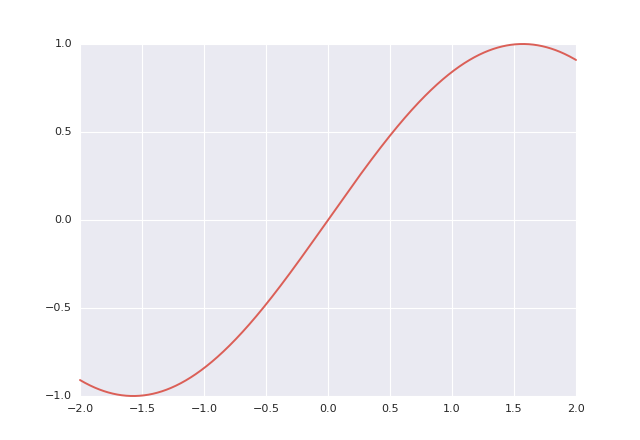

In [4]:
with replot.Figure() as figure:
    figure.plot(np.sin, (-2, 2))

<IPython.core.display.Javascript object>


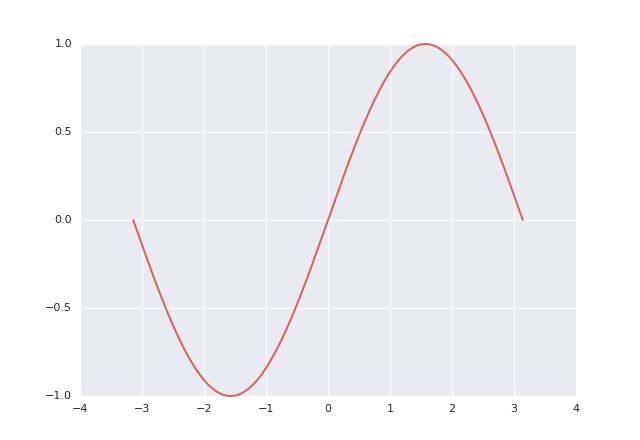

In [5]:
with replot.Figure() as figure:
    x = np.linspace(-np.pi, np.pi, 200)
    figure.plot(np.sin, x)

<IPython.core.display.Javascript object>


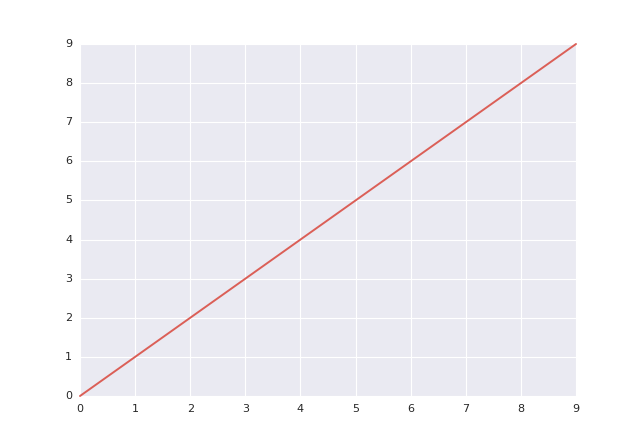

In [6]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x)

<IPython.core.display.Javascript object>


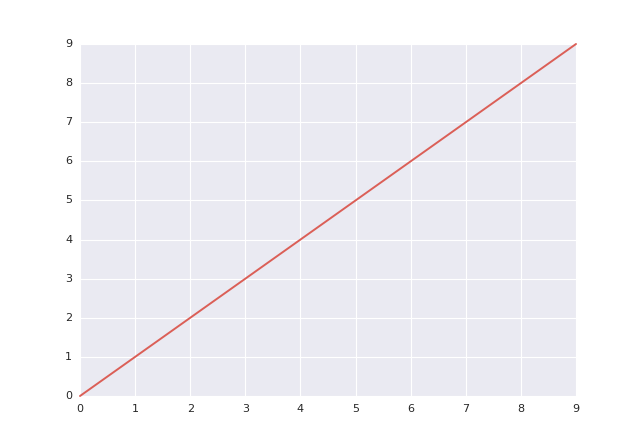

In [7]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x)

<IPython.core.display.Javascript object>


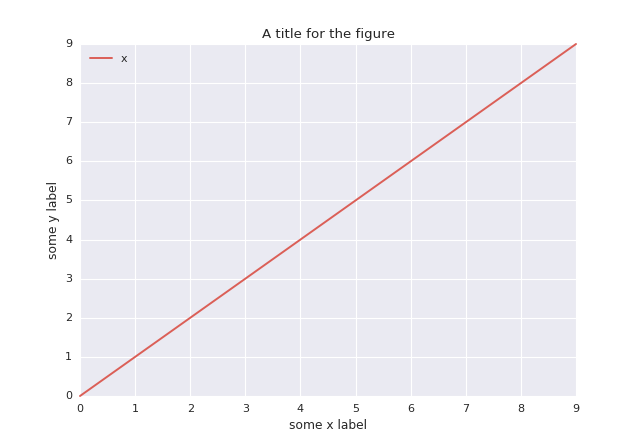

In [8]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x, label="x")
    figure.xlabel = "some x label"
    figure.ylabel = "some y label"
    figure.title = "A title for the figure"

<IPython.core.display.Javascript object>


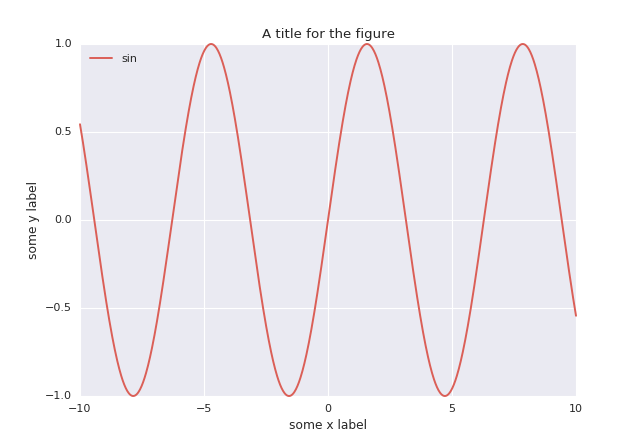

In [9]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend="best") as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


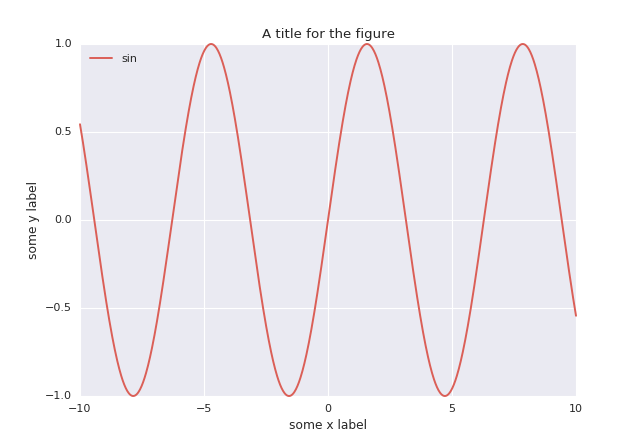

In [10]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


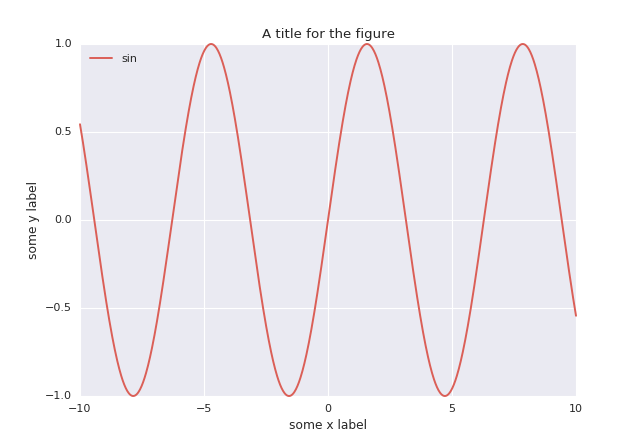

In [11]:
fig = replot.Figure(xlabel="some x label",
                      ylabel="some y label",
                      title="A title for the figure",
                      legend="best")
fig.plot(np.sin, label="sin")
fig.show()

<IPython.core.display.Javascript object>


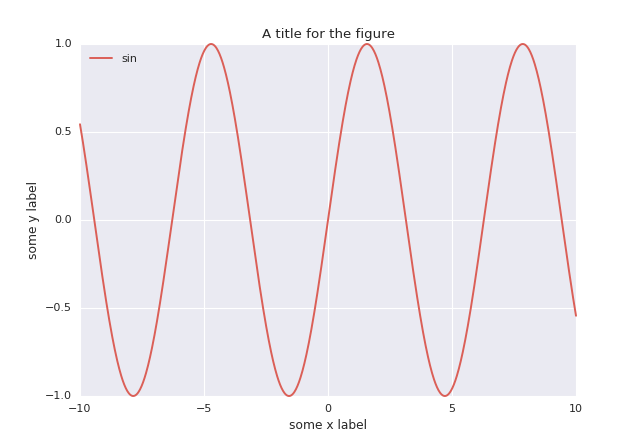

In [12]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure") as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


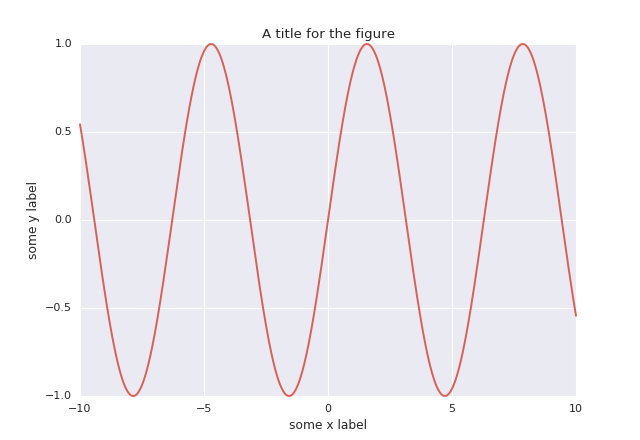

In [13]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=False) as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


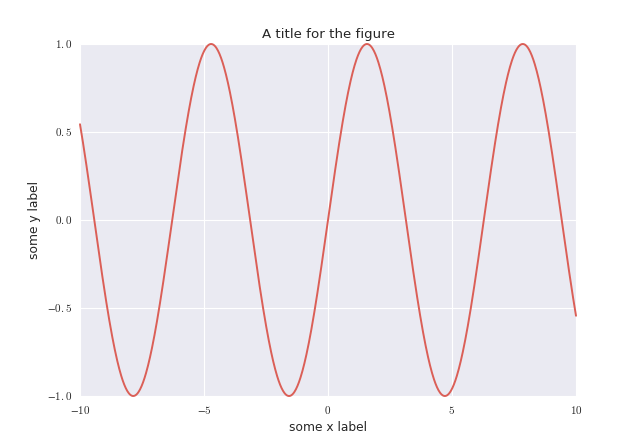

In [7]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin)

<IPython.core.display.Javascript object>


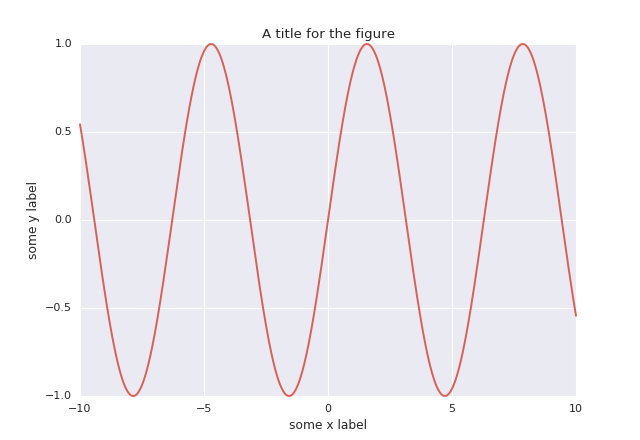

In [15]:
replot.plot([np.sin],
              xlabel="some x label",
              ylabel="some y label",
              title="A title for the figure",
              legend="best")

<IPython.core.display.Javascript object>


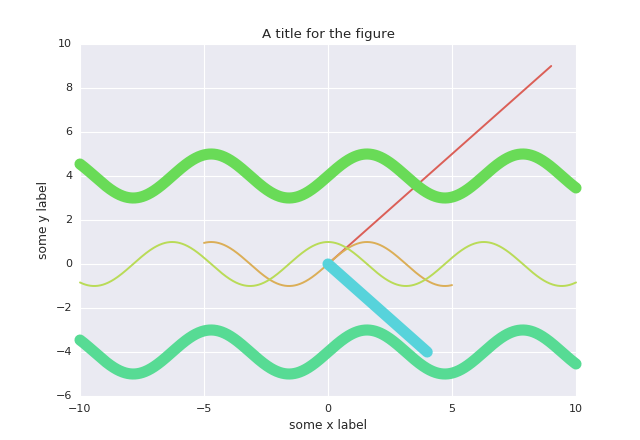

In [16]:
replot.plot([range(10), (np.sin, (-5, 5)), np.cos, (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best")

<IPython.core.display.Javascript object>


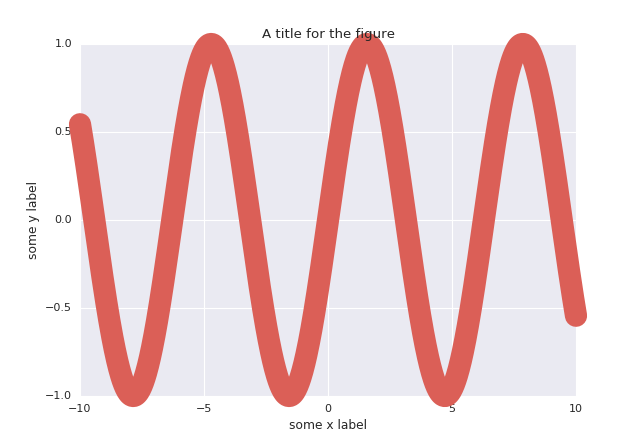

In [17]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin, linewidth=20)

<IPython.core.display.Javascript object>


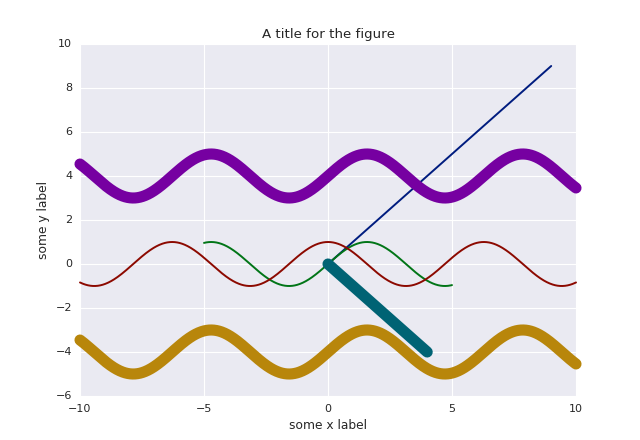

In [18]:
replot.plot([range(10), (np.sin, (-5, 5)), np.cos, (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best",
            palette="dark")

<IPython.core.display.Javascript object>


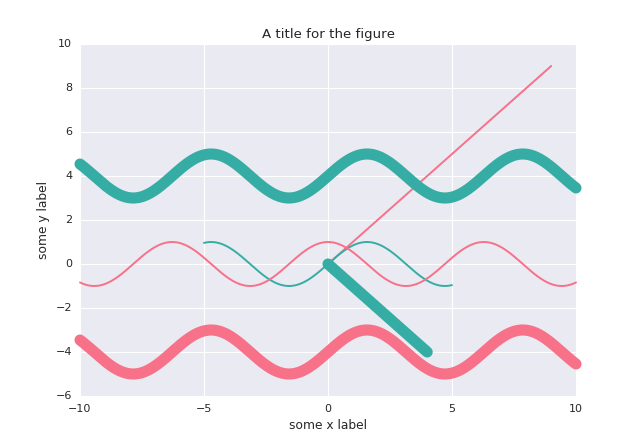

In [19]:
replot.plot([range(10), (np.sin, (-5, 5)), np.cos, (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best",
            palette=replot.sns.color_palette("husl", 2))

<IPython.core.display.Javascript object>


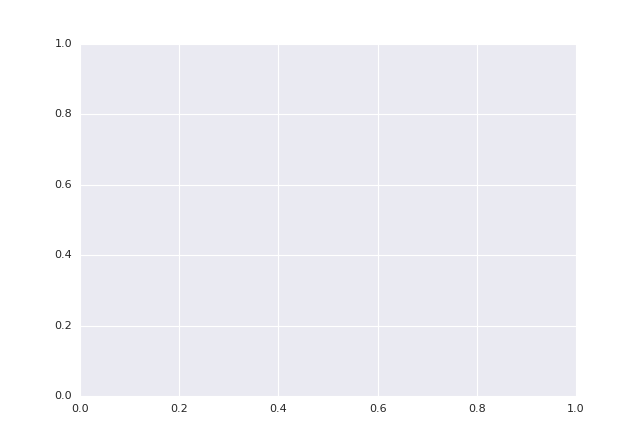

InvalidParameterError: Second parameter in plot command should be a tuple specifying plotting interval.

In [8]:
with replot.Figure() as figure:
    figure.plot(np.sin, None)

<IPython.core.display.Javascript object>


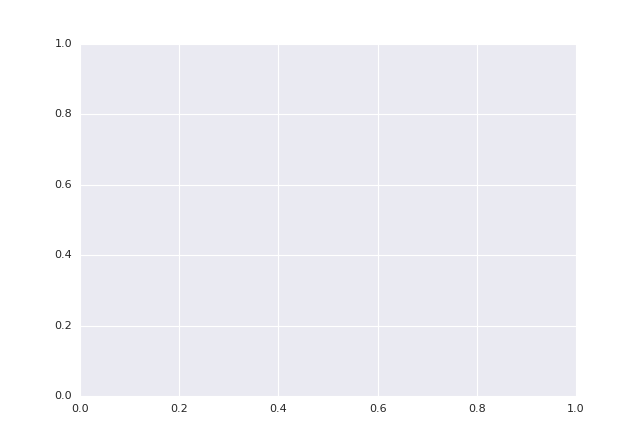

InvalidParameterError: You should pass at least one argument to this function.

In [9]:
with replot.Figure() as figure:
    figure.plot()